ĐỖ Đức Hào
19146184
Lớp T5_Tiết 12-15

#  *** CNN CIFAR100 ***

In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten

In [ ]:
(x_train,y_train),(x_test,y_test)= cifar100.load_data()
x = x_test

In [ ]:
x_train = x_train.astype('float32')/255.0 #chia dữ liệu về dạng 0:1 
x_test = x_test.astype('float32')/255.0
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [ ]:
#assigning names of labels from 0 to 99 to array 'names'...
names=['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
       'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 
       'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
       'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
       'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
       'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
       'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
       'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
       'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
       'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

In [ ]:
# MODEL CNN
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D

model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(32,32,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(100,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.01,momentum=0.9)

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=180,epochs=200,verbose=1,validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
278/278 [==============================] - 6s 21ms/step - loss: 4.3505 - accuracy: 0.0432 - val_loss: 4.0162 - val_accuracy: 0.0923
Epoch 2/200
278/278 [==============================] - 5s 19ms/step - loss: 3.7532 - accuracy: 0.1243 - val_loss: 3.6184 - val_accuracy: 0.1511
Epoch 3/200
278/278 [==============================] - 5s 20ms/step - loss: 3.3917 - accuracy: 0.1846 - val_loss: 3.2810 - val_accuracy: 0.2031
Epoch 4/200
278/278 [==============================] - 5s 19ms/step - loss: 3.1340 - accuracy: 0.2292 - val_loss: 3.1026 - val_accuracy: 0.2378
Epoch 5/200
278/278 [==============================] - 5s 19ms/step - loss: 2.9069 - accuracy: 0.2707 - val_loss: 3.0036 - val_accuracy: 0.2569
Epoch 6/200
278/278 [==============================] - 5s 19ms/step - loss: 2.7146 - accuracy: 0.3072 - val_loss: 2.8215 - val_accuracy: 0.2935
Epoch 7/200
278/278 [==============================] - 5s 19ms/step - loss: 2.5418 - accuracy: 0.3402 - val_loss: 2.7030 - val_accuracy:

In [ ]:
#from keras.models import load_model
#model_cifar10 = load_model('CNN_cifar10.h5')
model.save('CNN_cifar100.h5')

'apple'

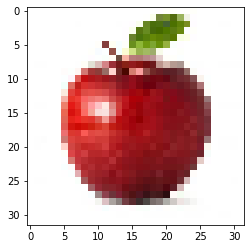

In [ ]:
import numpy as np
img = load_img('Apple.jpg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3) 
img = img.astype('float32')
img = img/255
names[np.argmax(model.predict(img))]

313/313 [==============================] - 2s 7ms/step - loss: 5.8976 - accuracy: 0.3475
Test loss=  5.897602558135986
Test accuracy=  0.3474999964237213


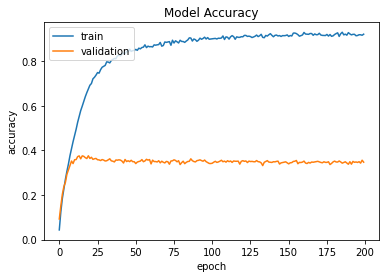

In [ ]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')